# Anomaly Detection

In statistics, an outlier is a data point that differs significantly from other observations, in other words an **Anomaly**.

![Outlier](images\outlier.png)


## The Dataset
Requests for NWT in English from United States printed in North America.
Columns:
- Date 
- Requets 
- Language
- Publication
- Geo Name 

## Inter quartile Range (IQR)

![Boxplot](images/Boxplot.png)

- **in**: the lowest data point in the distribution excluding any outliers.
- **Max**: the highest data point in the distribution excluding any outliers.
- **Median (Q2 / 50th percentile)** : the middle value of the dataset.
- **First quartile (Q1 / 25th percentile)** : is the median of the lower half of the dataset.
- **Thirds quartile (Q3 / 75th percentile)** : is the median of the upper half of the dataset.

The Interquartile Range (IQR) is important as it is what defines outliers. Essentially, it is the following:

```python
IQR = Q3-Q1
```
It is an outlier if:
- If observed points are below (Q1 − 1.5 * IQR) or the boxplot lower whisker.
- Similarly, if observed points are above (Q3 + 1.5 * IQR) or the boxplot upper whisker.

![Boxplot](images/Boxplot_normal_distribution.png)

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from collections import Counter

In [5]:
request_data = pd.read_csv('data/requests_nwt_usa_english_north_america.csv')
request_data

,Language Name,Net Requests,Publication Symbol,Geo Name,Service Year and Month
0,English,13344,nwt,United States,SY201401
1,English,593104,nwt,United States,SY201402
2,English,559085,nwt,United States,SY201403
3,English,45499,nwt,United States,SY201404
4,English,35705,nwt,United States,SY201405
...,...,...,...,...,...
88,English,5595,nwt,United States,SY202105
89,English,5584,nwt,United States,SY202106
90,English,5099,nwt,United States,SY202107
91,English,4999,nwt,United States,SY202108


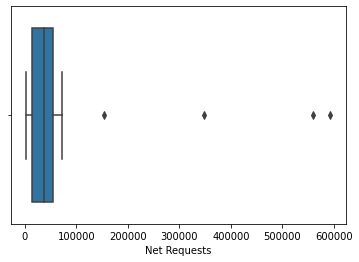

In [7]:
sns.boxplot(request_data['Net Requests'])
plt.show()

### The Tuckey Method Outlier Detection
The tuckey method outlier detection is a non-visual method of the box plot.

1. Obtains:
 - The 1st Quartile
 - The 3rd Quartile
 - The IQR
2. Next, it defines the outlier step, which, just like in boxplots, is 1.5 * IQR
3. It detects outliers by:
 - Seeing if the observed point is < Q1 — outlier step
 - Seeing if the observed point is Q3 + outlier step
4. It then checks selects observations that have k outliers(in this case, k = 2)

In [10]:
Q1 = np.percentile(request_data['Net Requests'], 25)
Q3 = np.percentile(request_data['Net Requests'], 75)
        
IQR = Q3 - Q1

lower_fence = Q1 - (1.5 * IQR)
upper_fence = Q3 + (1.5 * IQR)

outliers = request_data[(request_data['Net Requests'] < lower_fence) | (request_data['Net Requests'] > upper_fence)]
outliers








,Language Name,Net Requests,Publication Symbol,Geo Name,Service Year and Month
1,English,593104,nwt,United States,SY201402
2,English,559085,nwt,United States,SY201403
71,English,346952,nwt,United States,SY201912
73,English,152989,nwt,United States,SY202002
